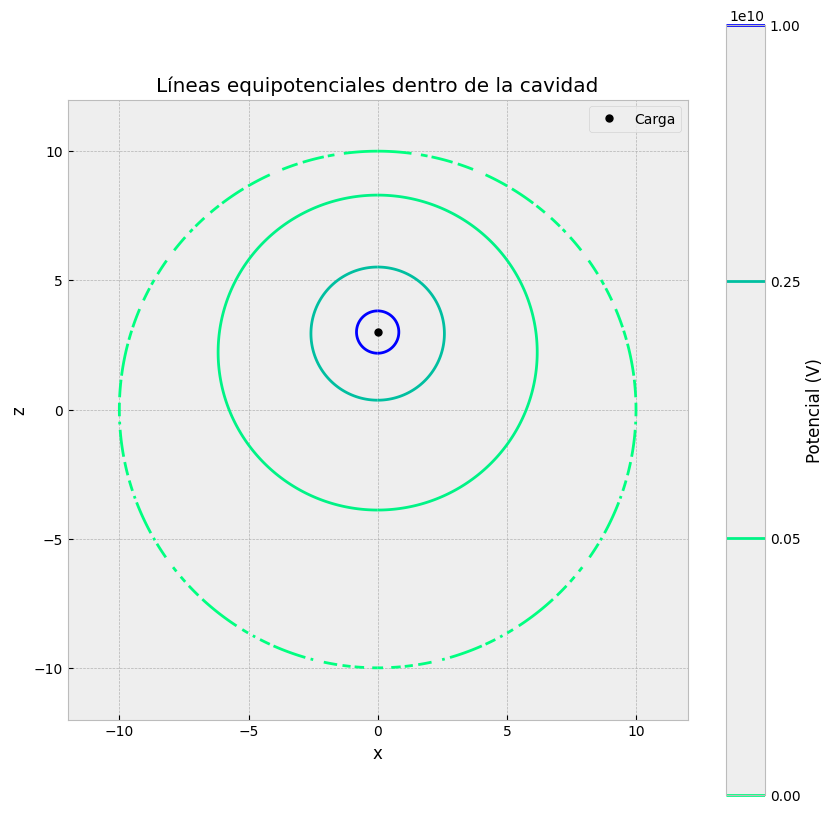

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('bmh')

# Definir el rango de r y theta
r = np.linspace(0, 10, 300)
theta = np.linspace(0, np.pi, 300)

R, Theta = np.meshgrid(r, theta)

# Definir la función V(r, theta)
V = 9e9*(1/np.sqrt(R**2 + 9 - 2*R*3*np.cos(Theta)) - 10/np.sqrt(9*R**2 + 10**4 - 2*R*3*10**2*np.cos(Theta)))

# Convertir a coordenadas cartesianas para graficar
X = r * np.sin(Theta)
Y = r * np.cos(Theta)

# Graficar las líneas equipotenciales (contornos)
plt.figure(figsize=(10,10))   # tamaño imagen
equipotenciales = [0, 5e8, 2.5e9, 1e10]     # valores equipotenciales
contour = plt.contour(X, Y, V, levels=equipotenciales, cmap='winter_r')  # superficies
contour2 = plt.contour(-X, Y, V, levels=equipotenciales, cmap='winter_r')  # superficies
plt.colorbar(label="Potencial (V)")
plt.xlabel('x')
plt.ylabel('z')
plt.title('Líneas equipotenciales dentro de la cavidad')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(0, 3, 'ko', markersize=5, label='Carga')
plt.xlim([-12, 12]) # Ajusta los limites de los ejes
plt.ylim([-12, 12])
plt.legend()
plt.grid(True)
plt.show()



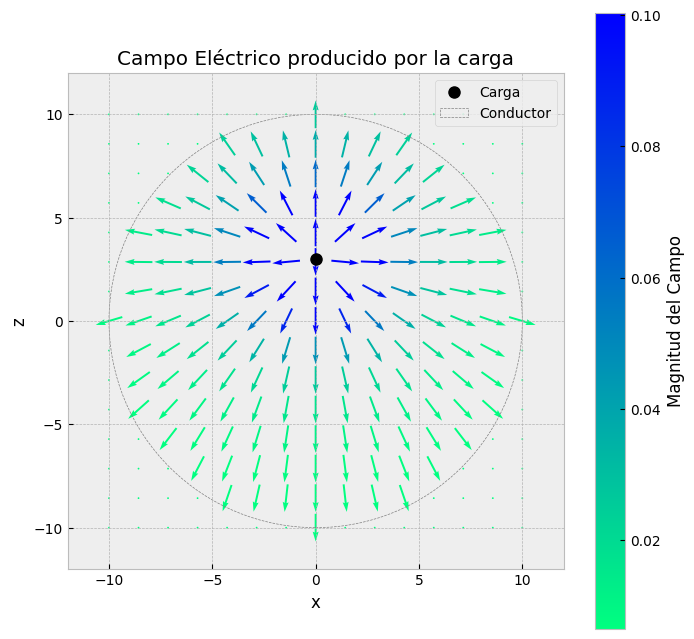

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

def campo_electrico(r, theta):
    """
    Función que define el campo eléctrico con las ecuaciones que proporcionaste.
    """
    # IMPORTANTE: Se añade un control para evitar la división por cero en tu E_theta,
    # que ocurre cuando r es exactamente 0.
    if r < 1e-6:
        return -1, 0

    # Componente radial (Er)
    numerador_er1 = -(3 * np.cos(theta) - r)
    denominador_er1 = (9 - 6 * r * np.cos(theta) + r**2)**(3/2)

    numerador_er2 = 10 * (300 * np.cos(theta) - 9 * r)
    denominador_er2 = (10000 - 600 * r * np.cos(theta) + 9 * r**2)**(3/2)

    Er = (numerador_er1 / denominador_er1) + (numerador_er2 / denominador_er2)

    # Componente polar (E_theta)
    numerador_eth1 = -300 * r * np.sin(theta)
    denominador_eth1 = (10000 - 600 * r * np.cos(theta) + 9 * r**2)**(3/2)

    numerador_eth2 = 3 * r * np.sin(theta)
    denominador_eth2 = (9 - 6 * r * np.cos(theta) + r**2)**(3/2)

    E_theta = ((numerador_eth1 / denominador_eth1) + (numerador_eth2 / denominador_eth2)) / r

    return Er, E_theta

# 1. DEFINE LA POSICIÓN DEL "CENTRO" DE TU SISTEMA
# Puedes cambiar estas coordenadas para mover todo el campo
posicion_fuente = np.array([0.0, 0.0]) # Ejemplo: centrado en el origen (0, 0)
x_fuente, z_fuente = posicion_fuente

# 2. Crear una malla de puntos CARTESIANA
x_vals = np.linspace(-10, 10, 15)
z_vals = np.linspace(-10, 10, 15)
x, z = np.meshgrid(x_vals, z_vals)

# 3. Calcular la posición de cada punto RELATIVA a la fuente
dx = x - x_fuente
dz = z - z_fuente

# 4. Convertir las coordenadas relativas a esféricas (r, theta)
r_relativo = np.sqrt(dx**2 + dz**2)
theta_relativo = np.arctan2(dx, dz)

# 5. Calcular las componentes del campo usando las coordenadas relativas
Er, E_theta = np.vectorize(campo_electrico)(r_relativo, theta_relativo)

# 6. Convertir las componentes esféricas a cartesianas para graficar
Ex = Er * np.sin(theta_relativo) + E_theta * np.cos(theta_relativo)
Ez = Er * np.cos(theta_relativo) - E_theta * np.sin(theta_relativo)

# 7. Aplicar máscara para campo cero fuera de la cavidad (radio 10)
distancia_centro = np.sqrt(x**2 + z**2)
mask_inside = distancia_centro <= 10

Ex = Ex * mask_inside
Ez = Ez * mask_inside


# normalizar las flechas (solo donde el campo es distinto de cero)
magnitud = np.sqrt(Ex**2 + Ez**2)
Ex_norm = np.zeros_like(Ex)
Ez_norm = np.zeros_like(Ez)
mask = magnitud > 1e-12
Ex_norm[mask] = Ex[mask] / magnitud[mask]
Ez_norm[mask] = Ez[mask] / magnitud[mask]

# graficar el campo vectorial
plt.figure(figsize=(8, 8))

# Usamos la magnitud logarítmica para mejorar el contraste de colores
magnitud_log = np.log1p(magnitud) # log1p(x) es log(1+x), bueno para valores cercanos a 0
cmin = np.percentile(magnitud_log[mask_inside], 10) # calcula percentiles dentro de la cavidad
cmax = np.percentile(magnitud_log[mask_inside], 90)
plt.quiver(x, z, Ex_norm, Ez_norm, np.clip(magnitud_log, cmin, cmax), cmap='winter_r', pivot='middle')

# Añadir un punto para visualizar el centro del sistema
plt.plot(0, 3, 'ko', markersize=8, label='Carga')

# Add a circle to represent the cavity boundary
circle = plt.Circle((0, 0), 10, color='gray', fill=False, linestyle='--', label='Conductor')
plt.gca().add_patch(circle)


plt.colorbar(label='Magnitud del Campo')
plt.title('Campo Eléctrico producido por la carga')
plt.xlabel('x')
plt.ylabel('z')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([-12, 12]) # Ajusta los limites de los ejes
plt.ylim([-12, 12])
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

Text(0, 0.5, 'Densidad de carga en la superficie [C/m$^2$]')

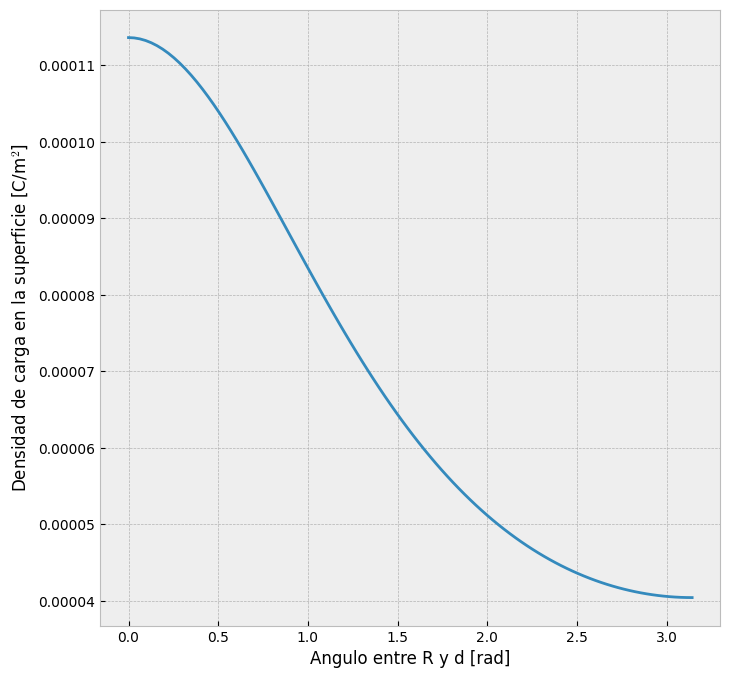

In [ ]:
def Dens(theta):
  return 1/(4*np.pi*10) * (10**2-9**2)/((10**2+9**2-60*np.cos(theta))**(3/2))

plt.figure(figsize=(8, 8))
theta = np.linspace(0, np.pi, 100)
plt.plot(theta, Dens(theta))
plt.xlabel('Angulo entre R y d [rad]')
plt.ylabel('Densidad de carga en la superficie [C/m$^2$]')